# List of all emoticons as GIFs

The code below generates a list of all emoticons in dota and their unicode character. You can copy&paste the character into dota to use the emoticon. It doesn't matter if you don't own the emoticon pack.

chr,alias,preview,chr,alias,preview,chr,alias,preview
,:wink:,,,:blush:,,,:cheeky:,
,:cool:,,,:crazy:,,,:cry:,
,:disapprove:,,,:doubledamage:,,,:facepalm:,
,:happytears:,,,:haste:,,,:hex:,
,:highfive:,,,:huh:,,,:hush:,
,:illusion:,,,:invisibility:,,,:laugh:,
,:rage:,,,:regeneration:,,,:sad:,
,:sick:,,,:sleeping:,,,:smile:,
,:surprise:,,,:aaaah:,,,:burn:,
,:hide:,,,:iceburn:,,,:tears:,

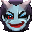
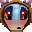
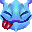
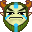
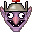
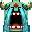
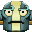
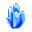
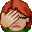
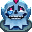
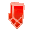
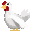
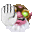
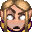
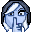
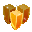
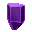
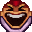
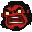
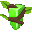
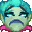
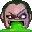
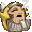
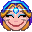
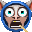
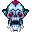
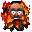
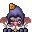
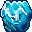
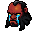
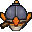
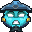
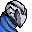
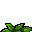
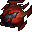
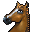
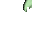
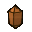
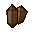
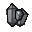
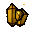
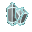
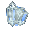
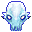
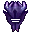
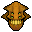
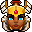
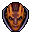
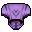
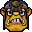
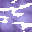
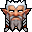
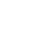
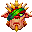
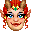
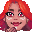
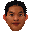
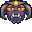
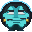
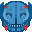
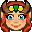
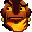
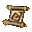
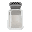
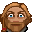
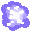
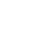
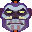
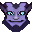
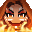
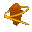
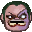
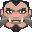
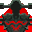
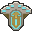
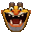
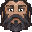
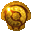
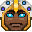

In [1]:
from base64 import b64encode
import vdf
import vpk
import requests
from PIL import Image
from collections import OrderedDict
from IPython.display import HTML

emoticons_root = "resource/flash3/images/emoticons/%s"

pak1 = vpk.open("/d/Steam/steamapps/common/dota 2 beta/dota/pak01_dir.vpk")
data = vdf.loads(pak1['scripts/emoticons.txt'].read().decode('utf-16le'), mapper=OrderedDict)

resp = "<table><tr>" + "<th>chr</th><th>alias</th><th>preview</th>"*3 + "</tr>\n"

!mkdir -p "./.etmp"

for k, v in data['emoticons'].items():
    !rm -f ./.etmp/*
    
    im = Image.open(pak1.get_file(emoticons_root % v['image_name']))
    for i in range(im.size[0] / 32):
        im.crop((i*32, 0, (i+1)*32, 32)).save("./.etmp/%03d.png" % i)
    
    !convert -loop 0 -delay 10 -alpha set -dispose previous "./.etmp/*.png" "./.etmp/out.gif"
    
    if (int(k) - 1) % 3 == 0:
        resp += "<tr>\n"    
    resp += "<td>%s</td>\n" % unichr(0xE000 + int(k))
    resp += "<td>:%s:</td>\n" % v['aliases']['0']
    resp += '<td><img src="data:image/png;base64,%s"></td>\n' % b64encode(open('./.etmp/out.gif').read())
    if (int(k) - 1) % 3 == 2:
        resp += "</tr>\n"

!rm -rf ./.etmp
if (int(k) - 1) % 3 != 2:
    resp += "</tr>"
resp += "</table>"
    
HTML(resp)